# Cars Selling Price Predictions Using ML

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Check size of data
data.shape

(301, 9)

In [4]:
#Check informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data = data.drop('Car_Name', axis=1)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data['Years_old'] = 2022 - data.Year     
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [8]:
data.drop('Year', axis=1, inplace=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [9]:
# Used one Hot Encoding
data = pd.get_dummies(data,drop_first=True)

In [10]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


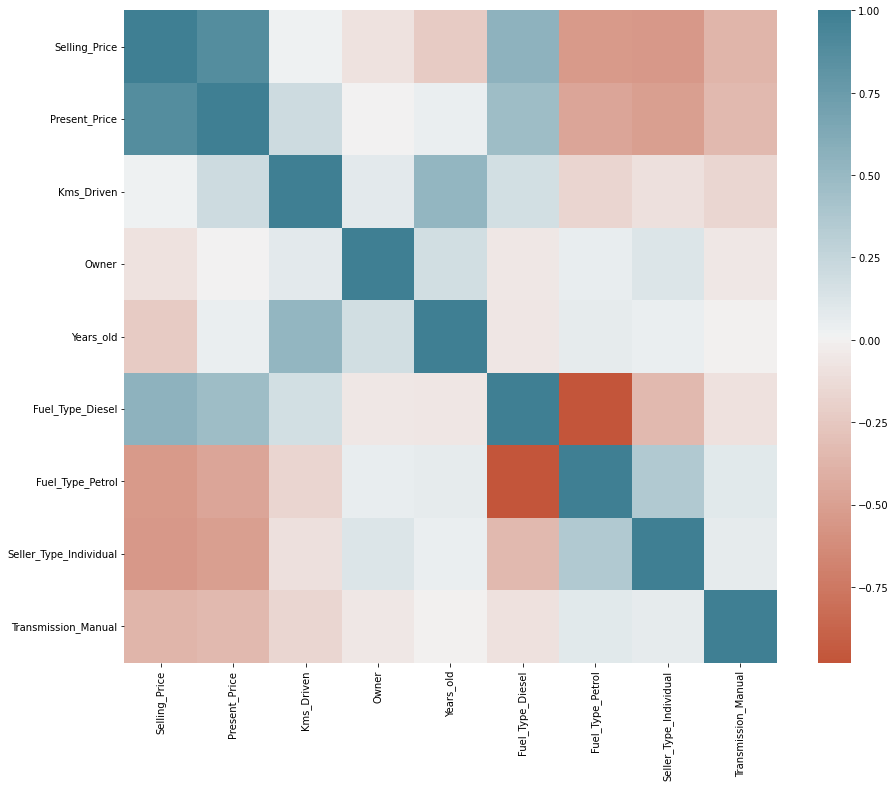

In [11]:
# using Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(
    data.corr(), 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);

### feature Selection

In [12]:
X = data.drop('Selling_Price', axis = 1)
y = data['Selling_Price']
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
model.feature_importances_

array([0.38946336, 0.04058913, 0.00134534, 0.07813077, 0.21936693,
       0.01043104, 0.12850018, 0.13217325])

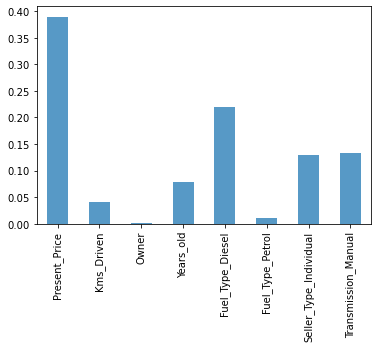

In [15]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90);

### Train test spliting

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.914434297222852

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.20, random_state=0)

In [19]:
cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

### Model building

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [22]:
perfect_model(X, y)

[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'friedman_mse'}, {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 30}]


,model,best_score,best_params
0,Linear_Regression,0.850996,{'normalize': False}
1,Decision_Tree,0.941286,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.894245,"{'n_estimators': 100, 'min_samples_split': 2, ..."


In [23]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
final_dec_model.fit(X_train,y_train)
final_dec_model.score(X_test,y_test)

0.9395849392229187

In [24]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.9565768369839343

In [25]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

array([0.93963014, 0.93118274, 0.94768269, 0.75216948, 0.91292966])

In [26]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.95365986, 0.91124338, 0.96981656, 0.85009955, 0.96082309])

In [27]:
predictions=final_rf_model.predict(X_test)
predictions

array([ 6.775     ,  0.48966667,  4.55625   ,  8.71783333, 15.241     ,
        5.28458333,  3.21708333,  0.4315    ,  3.85375   ,  4.69958333,
        2.77625   ,  0.78183333,  4.78375   ,  7.28091667,  7.69616667,
       14.94816667,  6.69116667,  3.97291667,  0.45008333,  1.58833333,
        2.94291667,  4.96291667,  5.24458333,  9.79533333,  0.19391667,
        0.73533333,  0.331     ,  0.71258333,  0.47725   ,  4.2385    ,
        2.48291667,  6.03583333,  0.48625   ,  7.35325   ,  3.35825   ,
        1.17058333,  5.5375    ,  5.34125   ,  0.23941667,  8.46708333,
        7.88141667, 23.39541667,  4.88875   ,  4.43708333,  5.84291667,
       11.33308333,  0.23033333,  0.78158333,  5.28375   ,  6.50125   ,
        6.85766667,  3.10958333,  5.23166667, 24.62666667,  1.19066667,
        1.13375   ,  0.46733333,  2.47541667,  3.60583333,  2.57191667,
        3.9215    ])

### Visualization 

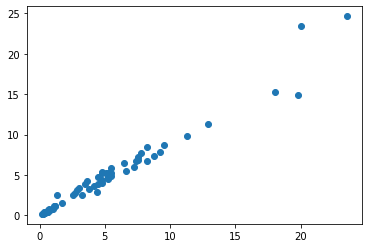

In [28]:
plt.scatter(y_test,predictions)

In [30]:
import pickle
with open('RandomForest_price_predict_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_rf_model, file)